<h1>A Data visualization of Diabetes

In the task 5 of Digital Empowerment Network, I have picked the Pina Indian Diabetes dataset that contains several data points in relation to the diabetes positive or negative patients. 

### Tools Used:
- **Pandas**: For data manipulation.
- **Matplotlib** and **Seaborn**: For data visualization.

### Dataset Features:
- **Pregnancies**: Number of times the patient has been pregnant.
- **Glucose**: Plasma glucose concentration.
- **Blood Pressure**: Diastolic blood pressure (mm Hg).
- **Skin Thickness**: Triceps skin fold thickness (mm).
- **Insulin**: 2-Hour serum insulin (mu U/ml).
- **BMI**: Body Mass Index (weight in kg/(height in m)^2).
- **Diabetes Pedigree Function (DPF)**: Likelihood of diabetes based on family history.
- **Age**: Age in years.
- **Outcome**: 1 indicates diabetes, 0 indicates no diabetes.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
           'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset to understand its structure
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Overview
We can already see some zeros in places where there should not be any, such as glucose, blood pressure, BMI, etc. We will address this in the next step.


### Step 1: Data Cleaning

We replace zero values in columns 

In [2]:
# Replace zero values in specific columns with the median of that column
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabetes_df[column] = diabetes_df[column].replace(0, diabetes_df[column].median())

# Checking if the data was correctly cleaned
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Step 2: Bar Plot - Average Glucose Level by Age Group

We will group the data by age ranges and plot the average glucose levels across these age groups. This will help us understand how glucose levels vary with age, which is an important factor in diabetes risk.



C:\Users\Muhammad\AppData\Local\Temp\ipykernel_14820\3219874635.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Glucose', data=diabetes_df, estimator='mean', ci=None)


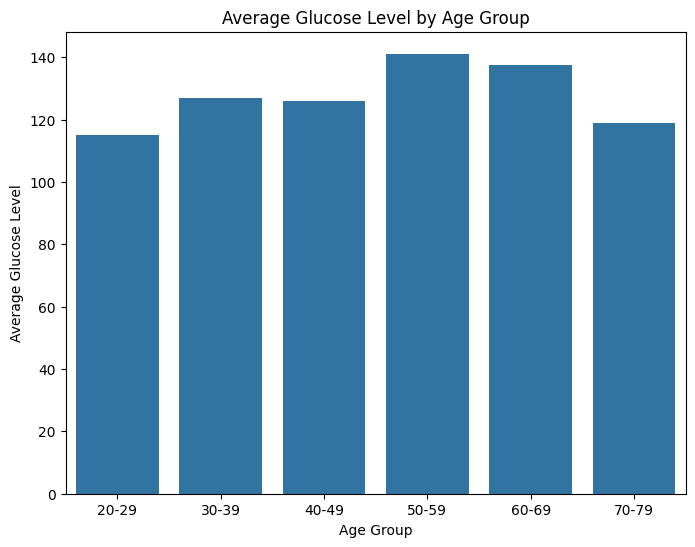

In [3]:
# Create age bins for grouping
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
diabetes_df['AgeGroup'] = pd.cut(diabetes_df['Age'], bins=bins, labels=labels)

# Bar plot of average glucose levels across age groups
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Glucose', data=diabetes_df, estimator='mean', ci=None)
plt.title('Average Glucose Level by Age Group')
plt.ylabel('Average Glucose Level')
plt.xlabel('Age Group')
plt.show()

## Step 3: Pie Chart - Proportion of Diabetes Cases

We will now visualize the proportion of people who have diabetes compared to those who don't using a pie chart.

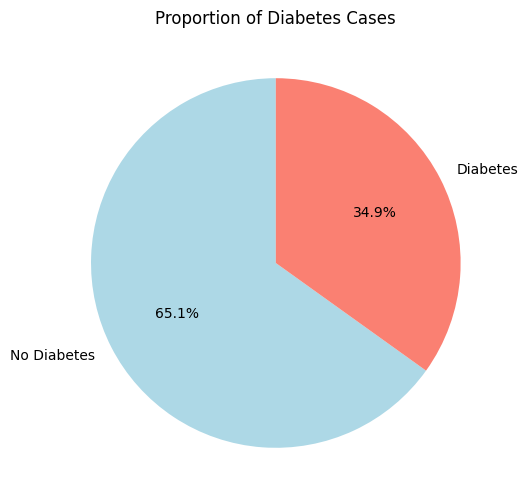

In [4]:
# Calculate the proportion of diabetes-positive and diabetes-negative cases
outcome_counts = diabetes_df['Outcome'].value_counts()

# Plot a pie chart for diabetes outcomes
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'salmon'])
plt.title('Proportion of Diabetes Cases')
plt.show()

## Step 4: Dot Plot - BMI vs. Glucose Levels by Diabetes Outcome

We will examine the relationship between BMI and glucose levels, categorized by diabetes outcome, using a dot plot.

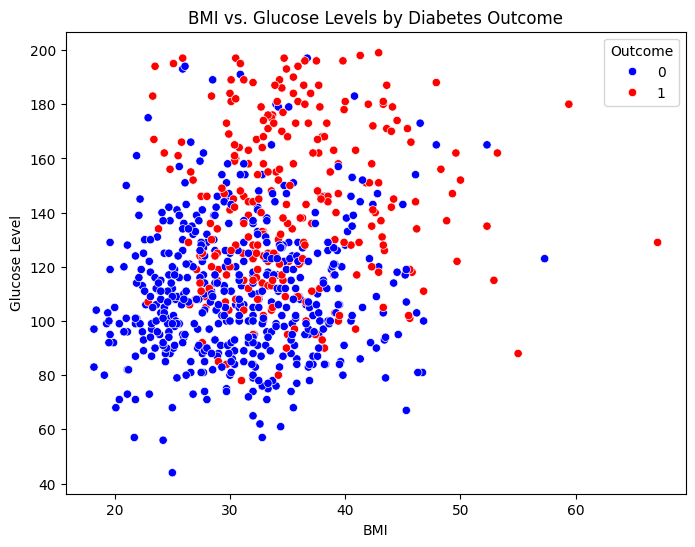

In [5]:
# Scatter plot showing the relationship between BMI and glucose levels, categorized by diabetes outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=diabetes_df, palette=['blue', 'red'])
plt.title('BMI vs. Glucose Levels by Diabetes Outcome')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.show()

## Step 5: Box Plot - Relationship between Diabetes Pedigree Function and Diabetes Outcome

We now explore how the **Diabetes Pedigree Function** (a measure of genetic likelihood of diabetes) relates to the diabetes outcome. We'll use a box plot to see the distribution of DPF across both diabetic and non-diabetic groups.

C:\Users\Muhammad\AppData\Local\Temp\ipykernel_14820\2800683065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_df, palette=['lightblue', 'salmon'])


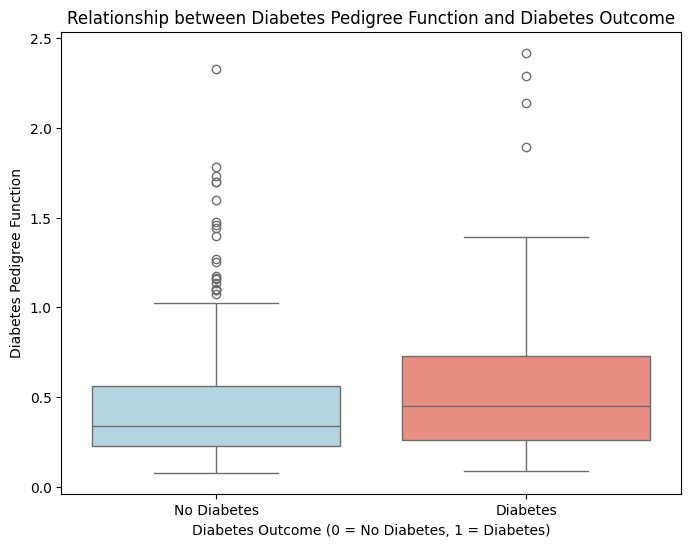

In [6]:
# Box plot showing the distribution of Diabetes Pedigree Function across diabetes outcomes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_df, palette=['lightblue', 'salmon'])
plt.title('Relationship between Diabetes Pedigree Function and Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

## Insights and Findings

Based on the visualizations, here are the key insights:

1. **Average Glucose Level by Age Group**: Glucose levels tend to increase with age, especially in the 50-59 and 60-69 age groups. This may indicate a higher risk of elevated glucose levels as people age.
   
2. **Proportion of Diabetes Cases**: The dataset shows that about 35% of the population is diabetic, highlighting the significance of diabetes as a health issue.

3. **BMI vs. Glucose Levels by Diabetes Outcome**: A positive correlation is seen between BMI and glucose levels, with diabetic individuals generally having higher BMI and glucose values.

4. **Relationship between Diabetes Pedigree Function and Diabetes Outcome**: The box plot shows that people with higher **Diabetes Pedigree Function** values are more likely to have diabetes, suggesting that genetic factors play an important role in diabetes risk.
